# Energy Regression

### Even after all the fancy correction, so final regression is still needed.

The energy resolution of the detector, defined as the width of the energy distribution for a given particle, plays a vital role in the precision of physics measurements. 

By applying energy regression techniques, it is possible to improve the energy resolution for electrons and photons, enhancing the ability to resolve subtle energy differences between particles and reconstruct their properties more accurately.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from Tools.Regression_ex import gen_data_nice, gen_data_exp

## Generate some electrons with a uniform true energy distribution, then pass them through the detector and measure their energy.

In [2]:
energy_true,energy_measured=gen_data_nice()

In [3]:
%matplotlib inline

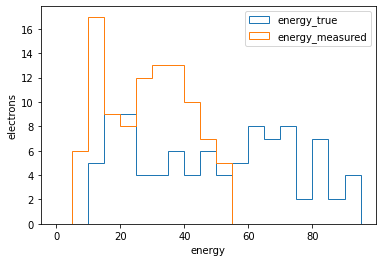

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting histograms
plt.hist(energy_true, bins=np.arange(0, 100, 5), label='energy_true',histtype='step')  
plt.hist(energy_measured, bins=np.arange(0, 100, 5), label='energy_measured',histtype='step')

# Add labels and a legend
plt.xlabel('energy')
plt.ylabel('electrons')
plt.legend()

# Show the plot
plt.show()


# The measured energy has a scale shift and also worse resolution

#### This is ofcourse simulation, so we know the true energy.
#### We can design regression to bring back the measured energy as close as possible to it's true energy

## Define the regression function

### Assumption : energy_measured = slope * energy_true  + intercept

In [6]:
def regression_function(energy, slope, intercept):
    return slope * energy + intercept

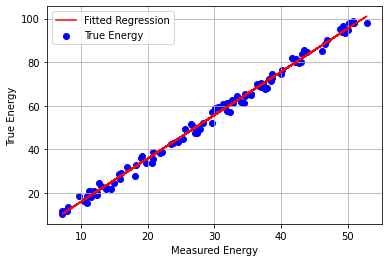

In [7]:
# Perform the regression
params, cov = curve_fit(regression_function, energy_measured, energy_true)

# Extract the fitted parameters
slope_fit, intercept_fit = params

# Generate predictions using the fitted parameters
energy_predicted = regression_function(energy_measured, slope_fit, intercept_fit)

# Plot the results
plt.scatter(energy_measured, energy_true, color='blue', label='True Energy')
plt.plot(energy_measured, energy_predicted, color='red', label='Fitted Regression')
plt.xlabel('Measured Energy')
plt.ylabel('True Energy')
plt.legend()
plt.grid()
plt.show()

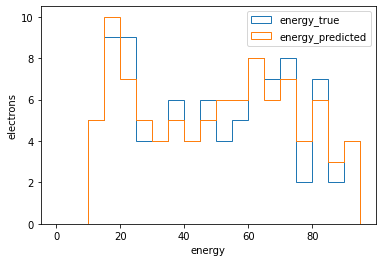

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting histograms
plt.hist(energy_true, bins=np.arange(0, 100, 5), label='energy_true',histtype='step')  
plt.hist(energy_predicted, bins=np.arange(0, 100, 5), label='energy_predicted',histtype='step')

# Add labels and a legend
plt.xlabel('energy')
plt.ylabel('electrons')
plt.legend()

# Show the plot
plt.show()


### Run again, but try using gen_data_exp next time. 
Does the regression work?

What do you think is the issue here? 

Answer: Maybe the same response function will not work, also regression might have to performed differently for different energies, which is usually the case. The regression may also depend on other factors aside from just measured energy.